---

# Neural Networks

___

An artificial neural network is a predictive model motivated by the way the brain operates. Think of the brain as a collection of neurons wired together.

In [23]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import random

## Perceptrons
___

The simplest neural network is the perceptron, which approximates a single neuron. It computes a weighted sum of its inputs and fires.

In [14]:
def step_function(x):
    return 1 if x >= 0 else 0

def perceptron_output(weights, bias, x):
    """ returns 1 if the perceptron fires, 0 if not"""
    calculation = np.dot(weights, x) + bias
    return step_function(calculation)

## Feed-Forward Neural networks
___

Feed-Forward neural network entails an input layer, one or more hidden layers, and an output layer. 

In [15]:
def sigmoid(t):
    return 1/(1 + np.exp(-t))

def neuron_output(weights, inputs):
    return sigmoid(np.dot(weights, inputs))

In order to train a neural network, we'll need to use calculus, and in order to use calculus, we need smooth functions. Sigmoid function is a good approximation.

Then we can represent a neural network as a list of layers, where each layer is just a list of the nuerons in that layer.

In [16]:
def feed_forward(neural_network, input_vector):
    """takes in a neural network
        and returns the output from forward-propagating the input"""
    outputs = []
    
    #process one layer at a time
    for layer in neural_network:
        input_with_bias = input_vector + [1]
        output = [neuron_output(neuron, input_with_bias) for neuron in layer]
        outputs.append(output)
        input_vector = output
    
    return outputs

In [17]:
xor_network = [#hidden layer
                [[20, 20, -30],    # 'and' neuron
                 [20, 20, -10]],   # 'or' neuron
                # output layer
                [[-60,60, -30]]]   # 2nd input but not first input

for x in [0, 1]:
    for y in [0, 1]:
        print x, y, feed_forward(xor_network, [x, y])[-1]

0 0 [9.3831466830067595e-14]
0 1 [0.99999999999990585]
1 0 [0.99999999999990585]
1 1 [9.3831466830068276e-14]


## Backpropagation

___
As usual we use data to train neutal networks. One popular approach is an algorithm called backpropagation that has similarities to the gradient descent algorithm. 

We adjust weights in the neural network using the algorithm:
1. Run feed_forward on an input vector to produce the outputs of all the neurons in the net work.
2. This results in an error for each output neuron -- the difference between its output and its target
3. Compotes the gradient of this error as a function of the neuron's weights, and adjust its weights in the direction that most decreases the error.
4. "Propagate" these output errors backward to infer errors for the hiden layer.
5. Compute the gradients of these errors and adjust the weights of hidden layers.


In [18]:
def backpropagate(network, input_vector, targets):
    
    hidden_outputs, outputs = feed_forward(network, input_vector)
    
    # the output*(1-output) is from the derivative of sigmoid
    output_deltas = [output * (1 - output)*(output - target) 
                    for output, target in zip(outputs, targets)]
    
    # adjust weights for output layer, one neuron at a time
    for i, output_neuron in enumerate(network[-1]):
        # ith output layer neuron 
        for j, hidden_output in enumerate(hidden_outputs + [1]):
            # adjust jth weight based on this neuron's delta and ij input
            output_neuron[j] -= output_deltas[i]*hidden_output
         
    # back-propagate errors to hidden layer
    hidden_deltas = [hidden_output * (1 - hidden_output) *
                    np.dot(output_deltas, [n[i] for n in output_layer])
                    for i, hidden_output in enumerate(hidden_outputs)]
        
    # adjust weights for hidden layer, one neuron at atime
    for i, hidden_neuron in enumerate(network[0]):
        for j, input in enumerate(input_vector + [1]):
            hidden_neuron[j] -= hidden_deltas[i] * input

___

## Example: Defeating CAPTCHA 
---

### define the neural network 
input element: 5*5 = 25;
1 hidden layer with 5 neurons; 
output layer with 10 neurons; 
each neuron is a 10 element vector represent 10 digits

In [19]:
#############################
# neural network definition #
#############################

random.seed(0)
input_size = 25 # each input is a vector of length 25
num_hidden = 5  # 1 hidden layer, we'll have 5 neurons in the hidden layer
output_size = 10 # we need 10 outputs for each input

# each hidden neuron has one weight per input, plus a bias weight
hidden_layer = [[random.random() for _ in xrange(input_size + 1)]
               for __ in xrange(num_hidden)]

# each output neuron has one weight per hidden neuron, plus a bias weight
output_layer = [[random.random() for _ in xrange(num_hidden + 1)]
               for __ in xrange(output_size)]

# the network starts out with random weights
network = [hidden_layer, output_layer]


### Train neural network

In [20]:
###########################
# neural network training #
###########################

zero = [1,1,1,1,1,
        1,0,0,0,1,
        1,0,0,0,1,
        1,0,0,0,1,
        1,1,1,1,1]
one = [0,0,1,0,0,
        0,0,1,0,0,
        0,0,1,0,0,
        0,0,1,0,0,
        0,0,1,0,0]
two = [1,1,1,1,1,
        0,0,0,0,1,
        1,1,1,1,1,
        1,0,0,0,0,
        1,1,1,1,1]
three = [1,1,1,1,1,
        0,0,0,0,1,
        1,1,1,1,1,
        0,0,0,0,1,
        1,1,1,1,1]
four = [1,0,0,0,1,
        1,0,0,0,1,
        1,1,1,1,1,
        0,0,0,0,1,
        0,0,0,0,1]
five = [1,1,1,1,1,
        1,0,0,0,0,
        1,1,1,1,1,
        0,0,0,0,1,
        1,1,1,1,1]
six = [1,1,1,1,1,
        1,0,0,0,0,
        1,1,1,1,1,
        1,0,0,0,1,
        1,1,1,1,1]
seven = [1,1,1,1,1,
        0,0,0,0,1,
        0,0,0,0,1,
        0,0,0,0,1,
        0,0,0,0,1]
eight = [1,1,1,1,1,
        1,0,0,0,1,
        1,1,1,1,1,
        1,0,0,0,1,
        1,1,1,1,1]
nine = [1,1,1,1,1,
        1,0,0,0,1,
        1,1,1,1,1,
        0,0,0,0,1,
        1,1,1,1,1]
inputs = [zero, one, two, three, four, five, six, seven, eight, nine]
targets = [[1 if i == j else 0 for i in xrange(10)]
          for j in xrange(10)]

# 10,000 iterations seems enough to converge
for _ in xrange(10000):
    for input_vector, target_vector in zip(inputs, targets):
        backpropagate(network, input_vector, target_vector)


def predict(input):
    return feed_forward(network, input)[-1]
predict(inputs[7])

[0.024521973898174929,
 1.0576030623170791e-05,
 1.3956363060379508e-10,
 0.017400413633184932,
 0.0010424389791314197,
 6.8281060788083614e-10,
 3.2721925578057628e-08,
 0.96889849594860245,
 1.1664852765015362e-08,
 2.4400695314417383e-08]

In [21]:
predict([1,1,1,1,1,
        1,0,0,0,1,
        1,1,1,1,1,
        1,1,0,0,1,
        1,1,1,1,1])

[0.0024748891253380226,
 1.3500399517235218e-14,
 7.0038209359308007e-10,
 1.0479803347849043e-05,
 2.1715577993551197e-09,
 0.04535706395954088,
 0.00049215604435028895,
 2.2383093862239574e-06,
 0.95369325528868609,
 0.25686602211802206]

### explore

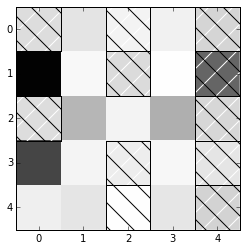

In [24]:
weights = network[0][0]
abs_weights = map(abs, weights)
grid = [abs_weights[row:(row+5)]
       for row in range(0,25,5)]

ax = plt.gca()

ax.imshow(grid,
         cmap=matplotlib.cm.binary,
         interpolation='none')

def patch(x, y, hatch, color):
    return matplotlib.patches.Rectangle((x-0.5, y-0.5), 1, 1,
                                hatch = hatch, fill=False, color=color)

for i in range(5):
    for j in range(5):
        if weights[5*i+j] < 0:
            ax.add_patch(patch(j, i, '/', "white"))
            ax.add_patch(patch(j, i, '\\', "black"))